In [ ]:
# Unsupervised Machine Learning Project using Country dataset

import numpy as np # linear algebra
import matplotlib.pyplot as plt #grapghs
import seaborn as sns
sns.set(style="whitegrid")
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


**Introduction: About the Dataset**

Clustering the Countries by using Unsupervised Learning for HELP International Objective: 

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization: 
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement: 
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

EDA
1. Descriptive Analysis

In [ ]:
# Loading the datasets.
path = "/content/drive/MyDrive/country_data.csv"
df = pd.read_csv(path)

# Getting info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Info of each columns**

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

income: Net income per person

inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.describe().round(2).style.background_gradient()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270000,41.110000,6.820000,46.890000,17144.690000,7.780000,70.560000,2.950000,12964.160000
std,40.330000,27.410000,2.750000,24.210000,19278.070000,10.570000,8.890000,1.510000,18328.700000
min,2.600000,0.110000,1.810000,0.070000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.800000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.shape ## Our dataset has 167 rows with 10 columns

(167, 10)

In [ ]:
df.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [ ]:
df.duplicated().any()

False

EDA

2. Univariate analysis

In [ ]:
features = [
    'child_mort', 'exports', 'health','imports',
    'income', 'inflation', 'life_expec', 'total_fer',
    'gdpp'
]

In [ ]:
# Features of smilar scales grouped together for better visibility
features_1 = [
    'income', 'gdpp'
]

features_2 = [
    'child_mort', 'exports','imports',
    'inflation', 'life_expec'
]

features_3 = [
    'health','total_fer'
]

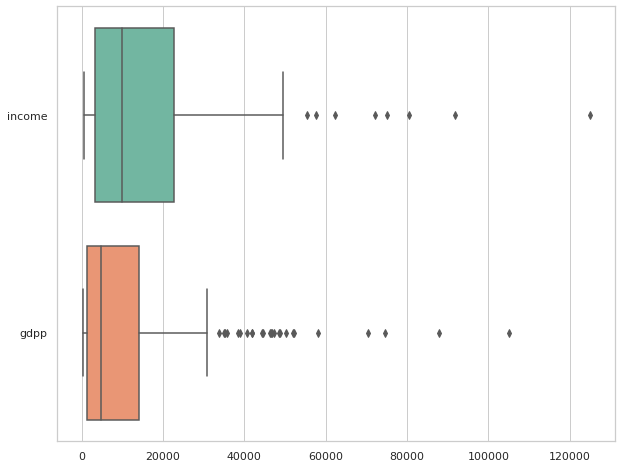

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[features_1], orient="h", palette="Set2");

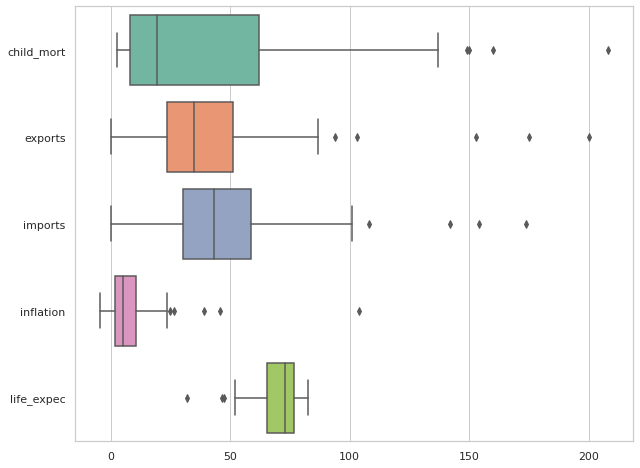

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[features_2], orient="h", palette="Set2");

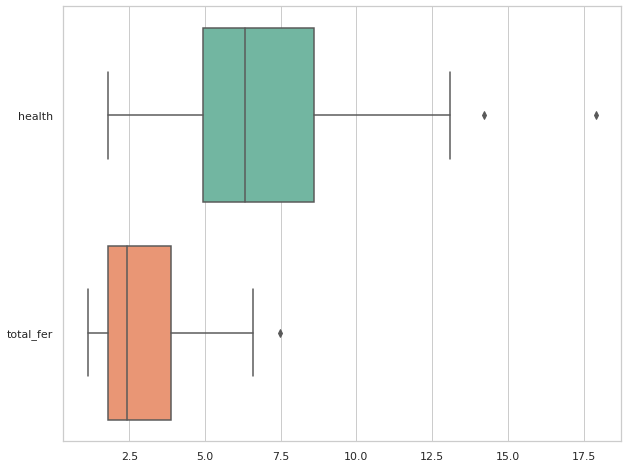

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[features_3], orient="h", palette="Set2");

EDA

3. Pair-Wise analysis

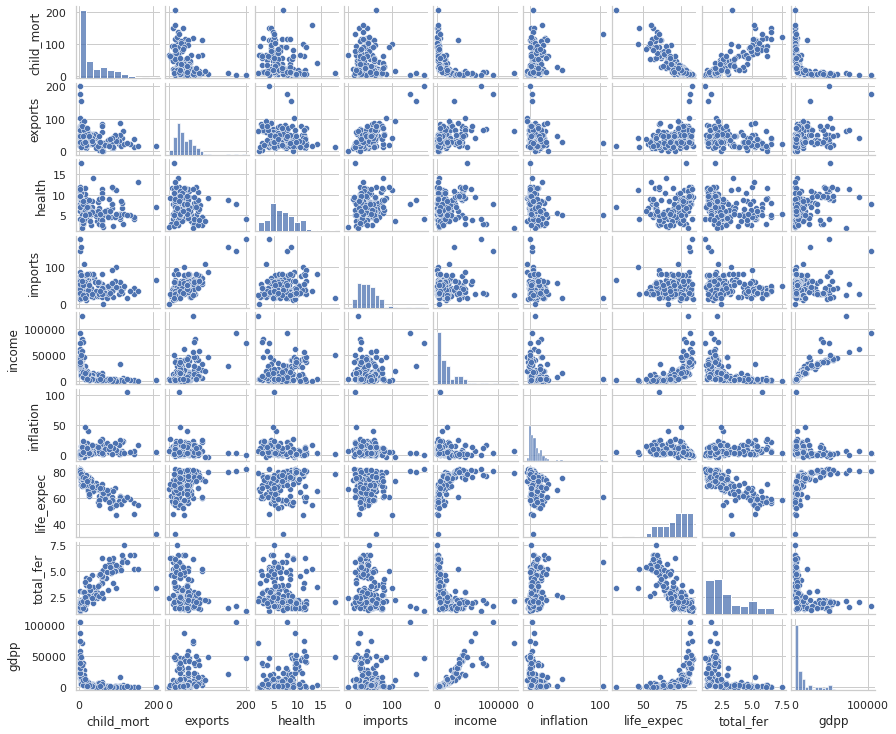

In [ ]:
g = sns.pairplot(df[features])
g.fig.set_size_inches(12,10)

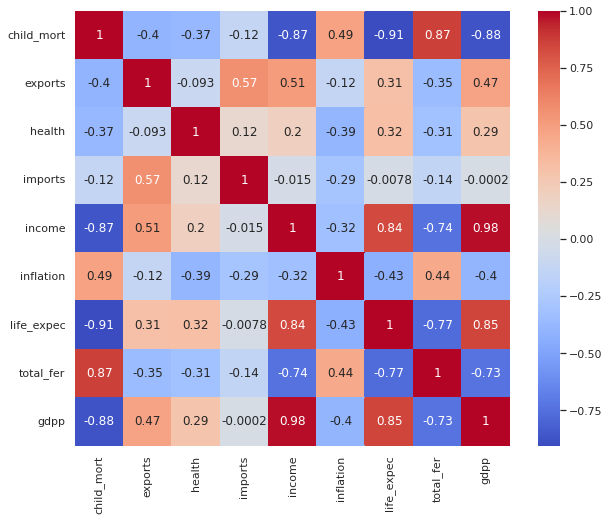

In [ ]:
df_cor_spear = df[features].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(df_cor_spear, square=True, cmap='coolwarm', annot=True);

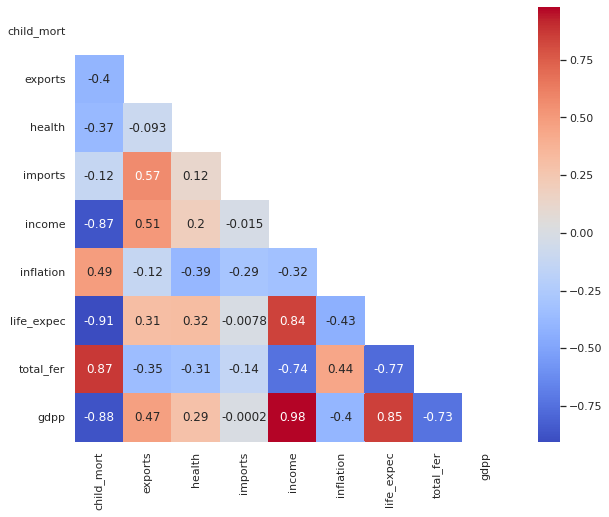

In [ ]:
df_cor_spear = df[features].corr(method='spearman')
mask = np.zeros_like(df_cor_spear)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(df_cor_spear, mask=mask, square=True, cmap='coolwarm', annot=True);

# **EDA Inferences:-**
Interesting dataset! Some inferences I can make-out right now are as follows:-

Child Mortality rate decreases with Increase in GDPP. Both of them have a very high correlation, which is expected as developed countries(having higer GDPP) will have better healthcare and hence better chance of survival.

Child Mortality rate is directly proportional to total fertility rate. Which is sort of a dependent feature in my opinion. Women are giving birth to more children if the previous ones didn't survive unfortunately.

Child Mortality rate is iversely proportional to Life expectance. Which is again a very dependent feature, because if more number children unfortunately die too early it pulls down the overall life expectancy of the country.

Inflation is weakly inversely proportional to GDPP which in my opinion might be due to the economic saturation in highly developed nations.

Per capita Income is heavily correlated to GDPP because one is roughly a function of another.

Import and exports increase with one another which implied the trading power of the country as a whole grows; i.e, countries who export more are also likely to import something else more.

Spendings on health increase with GDPP and Income, which is self-explanatory.

Income rises with exports which might be because people generate income by generating goods and services which are later exported.

Child Mortality rate is iversely proportional to Healthcare expenditure and Income. Which shows that unfortunate circumstances with low income groups is often responsible for a low life expentancy among children.

Keeping these in mind, we see that there is a very high level of correlation between most of the features. So let's first drop one of the variable pairs which have very strong correlation.

In [ ]:
features_to_drop = ['gdpp', 'child_mort', 'total_fer']
df.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
df['Trade_Deficiency'] = df['exports'] - df['imports']

In [ ]:
features = [feat for feat in df.columns if feat not in ['country']]
print(features)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


# **Scaling Data**
Since many of our algorithms are based on point-to-point distance, it is essential to scale the data as a higher variance in one dimension might lead to worse performance of the model. We are just going to use the StandardScaler algorithm within sklearn. This will essentially make the mean of the data ~ 0 and variance ~ 1.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_data = pd.DataFrame(scaled_data, columns=features)
print(scaled_data)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

In [ ]:
def pair_plot_cluster(df, scaled_data, cluster, features=features):
    df[cluster] = scaled_data[cluster]
    num_clusters = df[cluster].nunique()
    g = sns.pairplot(
        df[features + [cluster]],
        hue=cluster,
        palette=sns.color_palette("husl", num_clusters)
    )
    g.fig.set_size_inches(12,10)
    plt.show()

In [ ]:
RANDOM_SEED = 42

# **K-means clustering**
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

Steps for performing k-means clustering

Choose the number of k of cluster.
Select Random k points, the centroids.(Not necessarily your dataset)
Assign each data point to the closet centroid -> that forms k clusters.
Compute and place the new centroid of each cluster.
Reassign each data point to the new closets centroid. if any reassignment took place, go to step->4, repeat accordingly. Otherwise the model is completed.

# Silhouette Validation

The silhouette ranges from −1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. Here we can see 4 gives the highest score, so we go for k value 5(k=5).

Here we get the pridicted values. Which country belong to which cluster. 0 is the first cluster, 1 is the second cluster, 2 is the third cluster and so on.  

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Add the k-means cluster to the dataset

Display all the countries with their cluster number accordingly

# **Hierarchical Clustering**
Is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

**Using the dendrogram to find the optimal number of clusters.**

The limitation of Dendrogram graph is, we are not able to find the most suitable k value, therefore, we will be using shilhouette validation to determine the most efficient k value.

**Shilhouette Validation**

From the result, it seems two is the most efficient K means.